# Decision Tree - Practical Problems

#### Library Imports with data sets iris and california house

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
import graphviz

np.random.seed(95)

### **1. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy**

In [4]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=95)

clf = DecisionTreeClassifier(random_state=95)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.93


### **2. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances**

In [5]:
#continuing the same problem
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=95)
clf_gini.fit(X_train, y_train)

print('Feature Importances (Gini):')
for name, score in zip(iris.feature_names, clf_gini.feature_importances_):
    print(f'{name}: {score:.4f}')

Feature Importances (Gini):
sepal length (cm): 0.0248
sepal width (cm): 0.0000
petal length (cm): 0.5461
petal width (cm): 0.4291


### **3. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy**

In [6]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=95)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f'Model Accuracy (Entropy): {accuracy_entropy:.2f}')

Model Accuracy (Entropy): 0.91


### **4. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)**

In [7]:
housing = fetch_california_housing()
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(housing.data, housing.target, test_size=0.25, random_state=95)

reg = DecisionTreeRegressor(random_state=95)
reg.fit(X_train_h, y_train_h)

y_pred_h = reg.predict(X_test_h)
mse = mean_squared_error(y_test_h, y_pred_h)
print(f'Mean Squared Error (Housing): {mse:.3f}')

Mean Squared Error (Housing): 0.527


### **5. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz**

In [8]:
#graphviz is like pickle. we can store the plot in dot language annd later view it.
#we need to install Graphviz software and add the bin to path.
# verify by running "dot --version" in the system terminal

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=95)

clf = DecisionTreeClassifier(random_state=95)
clf.fit(X_train, y_train)


dot_data = export_graphviz(clf, out_file="iris_tree.dot", feature_names=iris.feature_names,
                                class_names=iris.target_names, filled=True, rounded=True,
                                special_characters=False)   #to fix the render in github

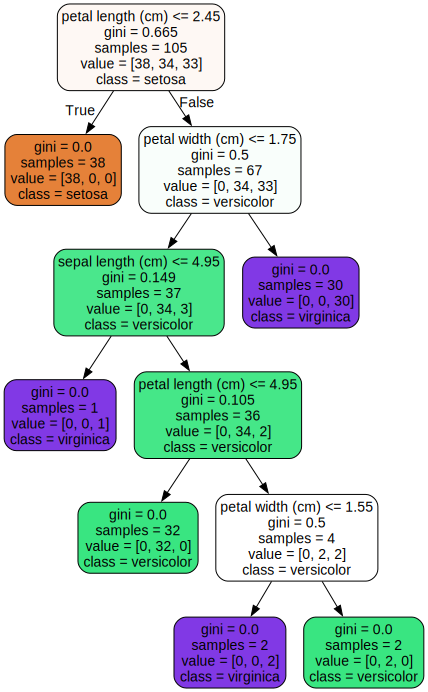

In [9]:
import graphviz
with open("iris_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### **6. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree**

In [10]:
clf_depth3 = DecisionTreeClassifier(max_depth=3, random_state=95)
clf_depth3.fit(X_train, y_train)    #iris data
acc_depth3 = accuracy_score(y_test, clf_depth3.predict(X_test))
print(f'Accuracy (max_depth=3): {acc_depth3:.2f}')

acc_full = accuracy_score(y_test, clf.predict(X_test))
print(f'Accuracy (fully grown tree): {acc_full:.2f}')

Accuracy (max_depth=3): 0.91
Accuracy (fully grown tree): 0.93


### **7. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree**

In [11]:
clf_min_split = DecisionTreeClassifier(min_samples_split=5, random_state=95)
clf_min_split.fit(X_train, y_train)
acc_min_split = accuracy_score(y_test, clf_min_split.predict(X_test))
print(f'Accuracy (min_samples_split=5): {acc_min_split:.2f}')
print(f'Accuracy (default tree): {accuracy:.2f}')

Accuracy (min_samples_split=5): 0.91
Accuracy (default tree): 0.93


### **8. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data**

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# fit transform for train and only transform for test data

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# on same iris data
clf_scaled = DecisionTreeClassifier(random_state=95)
clf_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, clf_scaled.predict(X_test_scaled))

print(f'Accuracy (scaled): {acc_scaled:.2f}')
print(f'Accuracy (unscaled): {accuracy:.2f}')

Accuracy (scaled): 0.93
Accuracy (unscaled): 0.93


### **9. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification**

In [13]:
from sklearn.multiclass import OneVsRestClassifier

dtc = DecisionTreeClassifier(random_state=95)   #CLF

ovr_clf = OneVsRestClassifier(dtc)
ovr_clf.fit(X_train, y_train)
acc_ovr = accuracy_score(y_test, ovr_clf.predict(X_test))
print(f'Accuracy (One-vs-Rest): {acc_ovr:.2f}')

Accuracy (One-vs-Rest): 0.93


### **10. Write a Python program to train a Decision Tree Classifier and display the feature importance scores**

In [14]:
clf_fi = DecisionTreeClassifier(random_state=95)
clf_fi.fit(X_train, y_train)
print('Feature Importances:')
imp = clf_fi.feature_importances_

for name, score in zip(iris.feature_names, clf_fi.feature_importances_):
    print(f'{name}: {score:.4f}')

Feature Importances:
sepal length (cm): 0.0248
sepal width (cm): 0.0000
petal length (cm): 0.5461
petal width (cm): 0.4291


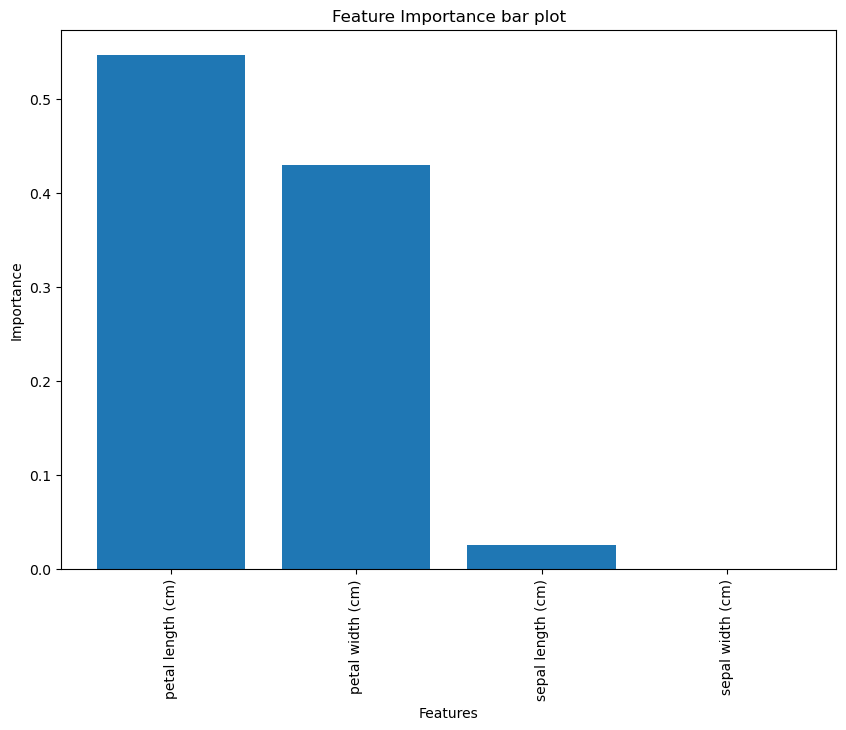

In [15]:
# visualize
idx_imp = np.argsort(imp)[::-1] #returns indices for the sorted
names = [iris.feature_names[i] for i in idx_imp]

plt.figure(figsize=(10,7))
plt.title("Feature Importance bar plot")
plt.bar(range(iris.data.shape[1]), imp[idx_imp])

plt.xticks(range(iris.data.shape[1]), names, rotation = 90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

### **11. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree**

In [16]:
reg_max5 = DecisionTreeRegressor(max_depth=5, random_state=95)
reg_max5.fit(X_train_h, y_train_h)

mse_max5 = mean_squared_error(y_test_h, reg_max5.predict(X_test_h))
mse_full = mean_squared_error(y_test_h, reg.predict(X_test_h))  #done above

print(f'MSE (max_depth=5): {mse_max5:.3f}')
print(f'MSE (unrestricted): {mse_full:.3f}')

MSE (max_depth=5): 0.513
MSE (unrestricted): 0.527


### **12. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy**

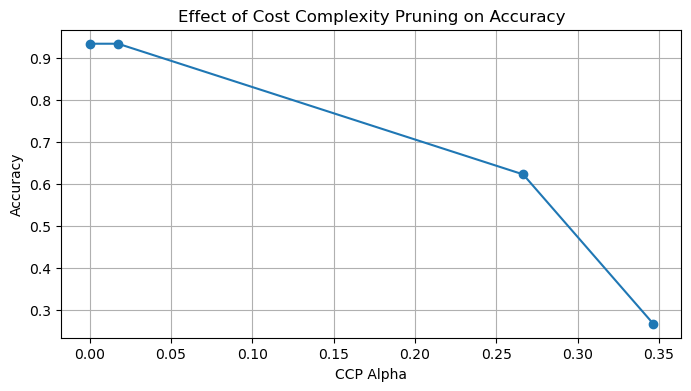

In [17]:
# about ccp :https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html *(need to go through theis again)

path = clf.cost_complexity_pruning_path(X_train, y_train)   #iris data
ccp_alphas = path.ccp_alphas

acc_scores = []
for alpha in ccp_alphas:
    pruned = DecisionTreeClassifier(random_state=95, ccp_alpha=alpha)
    pruned.fit(X_train, y_train)
    acc = accuracy_score(y_test, pruned.predict(X_test))
    acc_scores.append(acc)

plt.figure(figsize=(8, 4))
plt.plot(ccp_alphas, acc_scores, marker='o')
plt.xlabel('CCP Alpha')
plt.ylabel('Accuracy')
plt.title('Effect of Cost Complexity Pruning on Accuracy')
plt.grid(True)
plt.show()

### **13. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score**

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)
print(f'Precision: {precision_score(y_test, y_pred, average="macro"):.2f}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro"):.2f}')
print(f'F1-Score: {f1_score(y_test, y_pred, average="macro"):.2f}')

Precision: 0.94
Recall: 0.94
F1-Score: 0.94


### **14. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn**

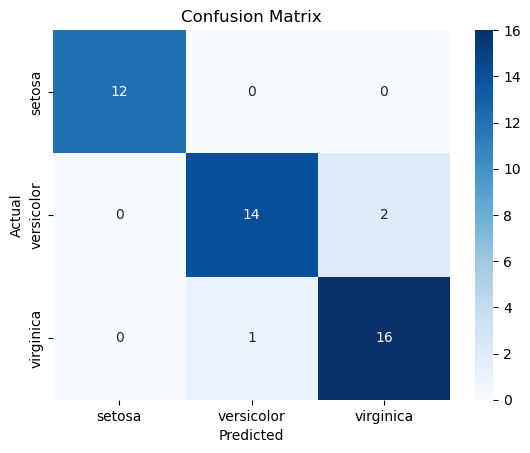

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **15. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split**

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=95), param_grid, cv=5)
grid.fit(X_train, y_train)

print('Best Parameters:', grid.best_params_)
print('Best Accuracy:', grid.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Accuracy: 0.9619047619047618
